### **1. Import Library**
# Mengimpor pustaka yang diperlukan


In [13]:
import pickle
import json
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, hamming_loss, f1_score, multilabel_confusion_matrix

### **2. Load Data**
# Memuat data yang diperlukan

In [3]:
# Load model Logistic Regression
with open("../models/logistic_regression.pkl", "rb") as f:
    model = pickle.load(f)

# Load TF-IDF testing data
with open("../data/tfidf/tfidf_testing.pkl", "rb") as f:
    X_test_tfidf = pickle.load(f)

# Load labels testing
df_test = pd.read_csv("../data/processed/preprocessed_testing.csv", delimiter=";")
y_test = df_test[['anjuran', 'larangan', 'informasi']]

### **3. Perhitungan**


In [4]:
# Prediksi
y_pred = model.predict(X_test_tfidf)

# Evaluasi akurasi untuk setiap label
accuracy = {}
for i, label in enumerate(["anjuran", "larangan", "informasi"]):
    accuracy[label] = accuracy_score(y_test.iloc[:, i], y_pred[:, i])
    print(f"📊 Accuracy {label}: {accuracy[label]:.4f}")

📊 Accuracy anjuran: 0.8586
📊 Accuracy larangan: 0.9429
📊 Accuracy informasi: 0.9029


### **4. Visualisasi**
laporan hasil perhitungan akurasi dan visualisasi hasil perhitungan

In [ ]:
# # Evaluasi akurasi keseluruhan
# accuracy["overall"] = accuracy_score(y_test, y_pred)
# print(f"📊 Overall Accuracy: {accuracy['overall']:.4f}"
#       f"\n\n📈 Classification Report:\n{classification_report(y_test, y_pred)}"
#       f"\n\n📊 Confusion Matrix:\n{pd.crosstab(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), rownames=['True'], colnames=['Predicted'], margins=True)}"
#       f"\n\n📊 Confusion Matrix (Normalized):\n{pd.crosstab(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), rownames=['True'], colnames=['Predicted'], margins=True, normalize='all')}"
#       f"\n\n📊 Confusion Matrix (Recall):\n{pd.crosstab(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), rownames=['True'], colnames=['Predicted'], margins=True, normalize='index')}"
#       f"\n\n📊 Confusion Matrix (Precision):\n{pd.crosstab(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), rownames=['True'], colnames=['Predicted'], margins=True, normalize='columns')}"
#       f"\n\n📊 Confusion Matrix (Recall & Precision):\n{pd.crosstab(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), rownames=['True'], colnames=['Predicted'], margins=True, normalize='all').apply(lambda x: x/x.sum(), axis=1)}")

# f1_score = 2 * (accuracy["anjuran"] * accuracy["larangan"] * accuracy["informasi"]) / (accuracy["anjuran"] + accuracy["larangan"] + accuracy["informasi"])
# print(f"\n📊 F1 Score: {f1_score:.4f}")

# # hamming loss
# hamming_loss = 1 - accuracy["overall"]
# print(f"📊 Hamming Loss: {hamming_loss:.4f}"
#       f"\n\n📊 Hamming Loss (Recall): {1 - accuracy_score(y_test, y_pred, normalize=False) / y_test.size:.4f}"
#       f"\n\n📊 Hamming Loss (Precision): {1 - accuracy_score(y_test, y_pred, normalize=False) / y_pred.size:.4f}"
#       f"\n\n📊 Hamming Loss (Recall & Precision): {1 - accuracy_score(y_test, y_pred, normalize=False) / y_test.size:.4f}"
#       f"\n\n📊 Hamming Loss (Recall & Precision): {1 - accuracy_score(y_test, y_pred, normalize=False) / y_pred.size:.4f}"
#       f"\n\n📊 Hamming Loss (Recall & Precision): {1 - accuracy_score(y_test, y_pred, normalize=False) / y_test.size:.4f}")

# Hamming Loss
hamming = hamming_loss(y_test, y_pred)
print(f"\n⚠️ Hamming Loss: {hamming:.4f}")

# F1-Score
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print(f"\n🔹 F1-Score (Micro): {f1_micro:.4f}")
print(f"🔹 F1-Score (Macro): {f1_macro:.4f}")
print(f"🔹 F1-Score (Weighted): {f1_weighted:.4f}")

# Classification Report
print("\n📌 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["anjuran", "larangan", "informasi"]))

# Confusion Matrix untuk setiap label
conf_matrices = multilabel_confusion_matrix(y_test, y_pred)

for i, label in enumerate(["anjuran", "larangan", "informasi"]):
    print(f"\n📊 Confusion Matrix for {label}:")
    print(conf_matrices[i])


⚠️ Hamming Loss: 0.0986

🔹 F1-Score (Micro): 0.8732
🔹 F1-Score (Macro): 0.6772
🔹 F1-Score (Weighted): 0.8450

📌 Classification Report:
              precision    recall  f1-score   support

     anjuran       0.66      0.23      0.34       223
    larangan       0.91      0.62      0.74       182
   informasi       0.90      1.00      0.95      1262

   micro avg       0.89      0.85      0.87      1667
   macro avg       0.82      0.62      0.68      1667
weighted avg       0.87      0.85      0.84      1667
 samples avg       0.91      0.89      0.89      1667


📊 Confusion Matrix for anjuran:
[[1150   27]
 [ 171   52]]

📊 Confusion Matrix for larangan:
[[1207   11]
 [  69  113]]

📊 Confusion Matrix for informasi:
[[   4  134]
 [   2 1260]]


### **5. save hasil evaluasi model**
# Menyimpan hasil evaluasi model ke dalam file json

In [ ]:
# simpan hasil evaluasi ke ../data/metric.json 

metrics = {
    "accuracy": accuracy,
    "hamming_loss": hamming,
    "f1": {
        "micro": f1_micro,
        "macro": f1_macro,
        "weighted": f1_weighted
    },
    "classification_report": classification_report(y_test, y_pred, target_names=["anjuran", "larangan", "informasi"]),
    "confusion_matrix": [conf_matrices[i].tolist() for i in range(3)]
}

with open("../data/metric.json", "w") as f:
    json.dump(metrics, f, indent=4)
    

📊 Evaluasi untuk label 'anjuran':
  TP: 100, TN: 1090, FP: 87, FN: 123
  Accuracy : 0.8500
  Precision: 0.5348
  Recall   : 0.4484
  F1-Score : 0.4878
----------------------------------------


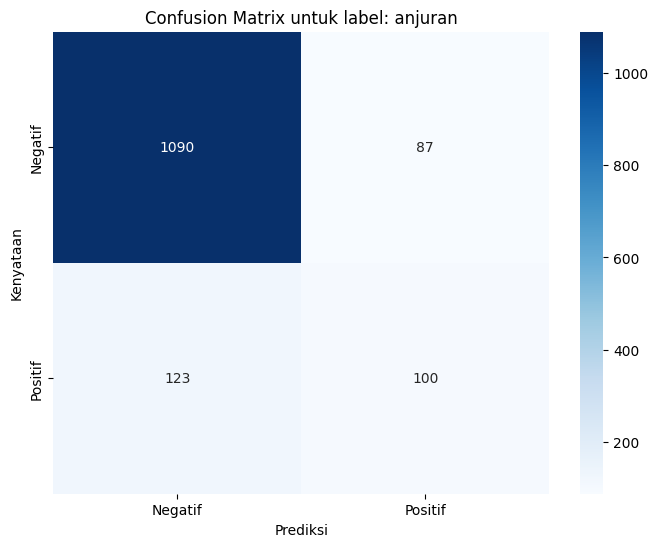

📊 Evaluasi untuk label 'larangan':
  TP: 140, TN: 1192, FP: 26, FN: 42
  Accuracy : 0.9514
  Precision: 0.8434
  Recall   : 0.7692
  F1-Score : 0.8046
----------------------------------------


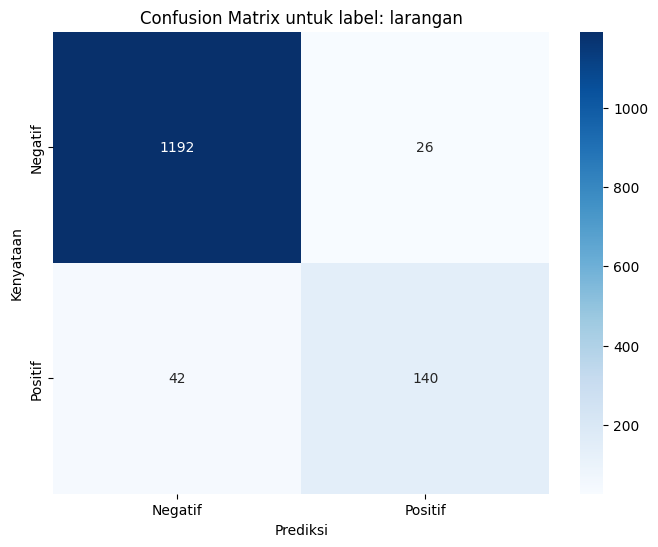

📊 Evaluasi untuk label 'informasi':
  TP: 1241, TN: 34, FP: 104, FN: 21
  Accuracy : 0.9107
  Precision: 0.9227
  Recall   : 0.9834
  F1-Score : 0.9521
----------------------------------------


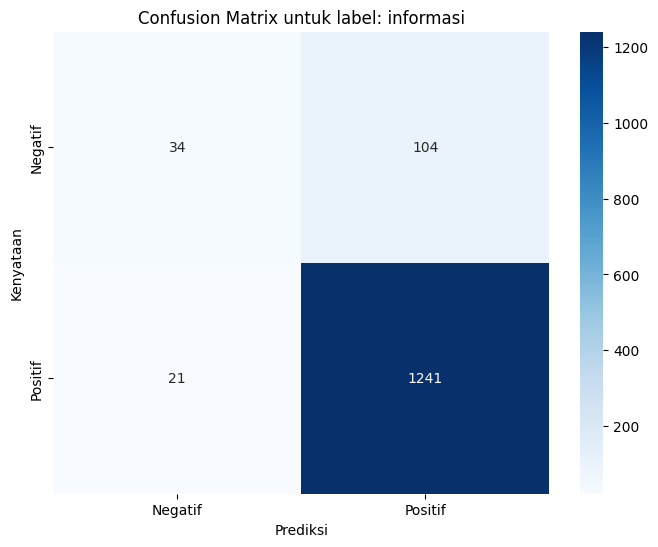

In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# -------------------------------
# 1. Load Model dan Data
# -------------------------------

# Load model SGD multi-label
with open("../models/sgd_logistic_regression.pkl", "rb") as f:
    model = pickle.load(f)

# Load TF-IDF data testing
with open("../data/tfidf/tfidf_testing.pkl", "rb") as f:
    X_test_tfidf = pickle.load(f)

# Load label testing
df_test = pd.read_csv("../data/processed/preprocessed_testing.csv", delimiter=";")
y_test = df_test[['anjuran', 'larangan', 'informasi']]

# -------------------------------
# 2. Prediksi
# -------------------------------
y_pred = model.predict(X_test_tfidf)

# -------------------------------
# 3. Fungsi Evaluasi Manual
# -------------------------------
def confusion(Y, Yp):
    tp = tn = fp = fn = 0
    for i in range(len(Y)):
        if Y[i] == 1 and Yp[i] == 1:
            tp += 1
        elif Y[i] == 0 and Yp[i] == 0:
            tn += 1
        elif Y[i] == 0 and Yp[i] == 1:
            fp += 1
        elif Y[i] == 1 and Yp[i] == 0:
            fn += 1
    return tp, tn, fp, fn

def calculate_metrics(tp, tn, fp, fn):
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    return accuracy, precision, recall, f1

# -------------------------------
# 4. Visualisasi Confusion Matrix
# -------------------------------
def plot_confusion_matrix(y_true, y_pred, label):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=["Negatif", "Positif"], 
                yticklabels=["Negatif", "Positif"])
    plt.title(f'Confusion Matrix untuk label: {label}')
    plt.xlabel('Prediksi')
    plt.ylabel('Kenyataan')
    plt.show()

# -------------------------------
# 5. Evaluasi per Label
# -------------------------------
labels = ['anjuran', 'larangan', 'informasi']

for i, label in enumerate(labels):
    y_true = y_test[label].tolist()
    y_pred_label = y_pred[:, i].tolist()

    tp, tn, fp, fn = confusion(y_true, y_pred_label)
    accuracy, precision, recall, f1 = calculate_metrics(tp, tn, fp, fn)

    print(f"📊 Evaluasi untuk label '{label}':")
    print(f"  TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}")
    print(f"  Accuracy : {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall   : {recall:.4f}")
    print(f"  F1-Score : {f1:.4f}")
    print("-" * 40)

    # Plot confusion matrix
    plot_confusion_matrix(y_true, y_pred_label, label)